# MNIST GAN 0.7

Added 0.4 dropout before final output in discriminator.
Added softened labels.

**Added missing BatchNormalisation** after every block in discriminator.

In [12]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session

import pickle

In [15]:
mnist_ex.preprocess_real(save_only=True)
real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
real_train.shape

(60000, 32, 32, 1)

In [16]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [17]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, 
                latent_dims=100, verbose=True)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 64)          204864    
_________________________________________________________________
batch_normalization_9 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)          0 

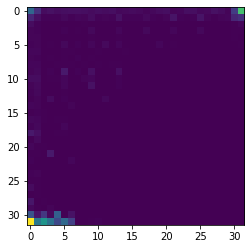

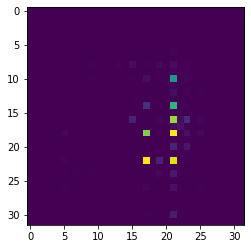

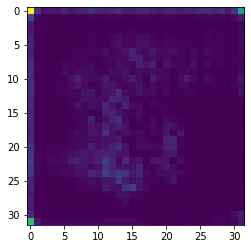

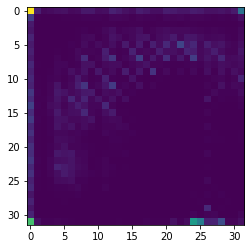

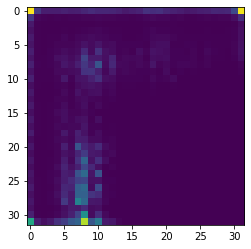

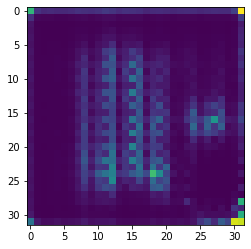

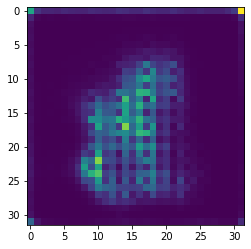

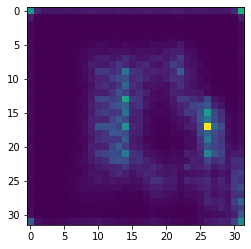

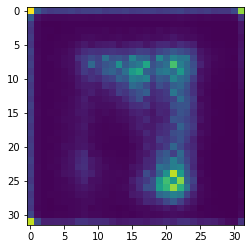

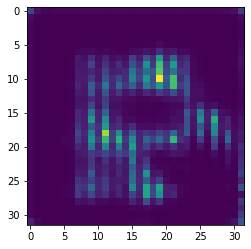

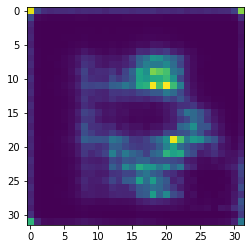

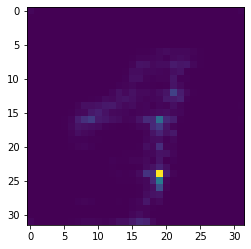

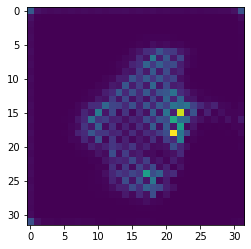

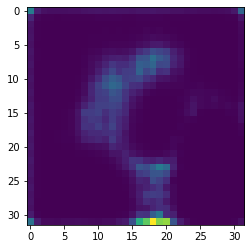

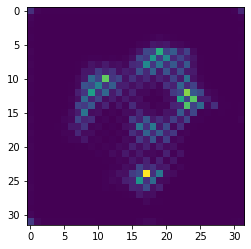

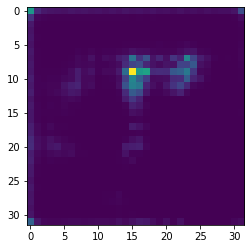

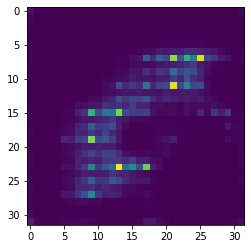

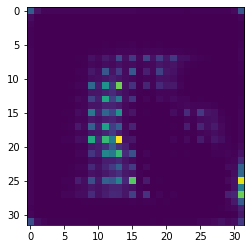

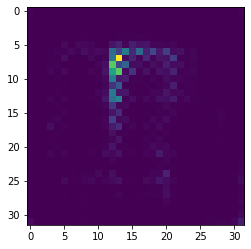

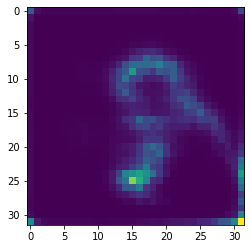

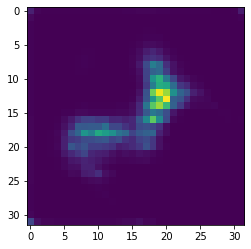

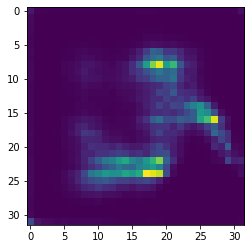

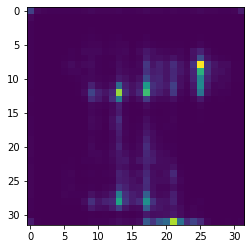

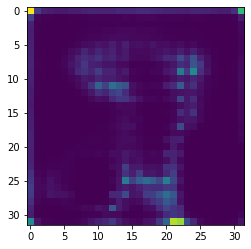

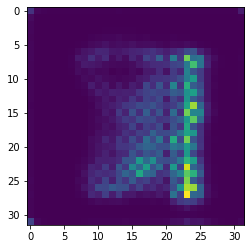

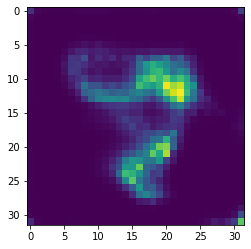

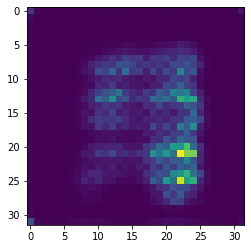

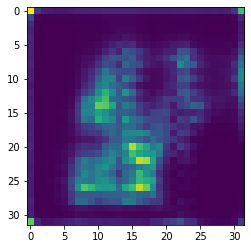

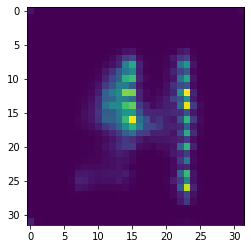

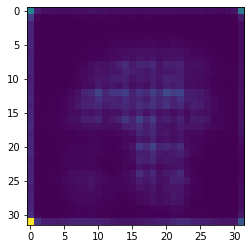

In [18]:
model.train(real_train, num_epochs=30, batch_size=30, labels=(0, 0.9))

In [ ]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 100))
  plt.imshow(fake_img.reshape(32, 32))
  plt.show()

In [ ]:
model.history.plot_loss()

In [ ]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")